# TP6 - Resolution de l'equation de Shrodinger

In [1]:
from scipy.linalg import eigh_tridiagonal
from scipy.special import hermite
import numpy as np

from matplotlib import pyplot as plt

On ecrit donc une fonction shrodinger qui retourne les vecteurs propres.

Si on prend edge="linear" on supposera que la fonction d'onde aux bord est quasi-lineaire et que l'on peut donc prendre la derivé seconde nul.

Si on prend edge="zero" on supposera que la fonction d'onde est nul hors de l'espace x.

In [2]:
def Shrodinger(x, V):
    #longeur du vecteur
    n = len(x)
    
    #largeur de l'espace
    L = x[-1] - x[0]
    
    #x environ constant
    dx = x[1] - x[0]
    dx_inv_square = 1/dx/dx
    
    #Hamiltonien
    diag = np.zeros(n)
    upper = np.full(n - 1, -dx_inv_square)
    for i in range(n):
        diag[i] = 2*dx_inv_square + V(x[i])
    
    #retour des vecteur propre
    val, vect = eigh_tridiagonal(diag, upper)
    return val, vect/np.sqrt(dx)

On peut maintenant ecrire des fonctions retournant des potentiels pour les differents potentiels du TP.

In [3]:
def PuitsCarre(L, d, v):
    def V(x):
        if L/2 - d/2 < x < L/2 + d/2:
            return -v
        else:
            return 0

    return V

def PuitsHarmonique(L, w):
    def V(x):
        return w*w*(x - L/2)*(x - L/2)
    
    return V

def DoublePuits(L, x0, V0, F=0):
    def V(y):
        x = y - L/2
        inter = x*x/x0/x0 - 1
        return V0*inter*inter + F*x
    
    return V

def PotentielNul(x):
    return 0

## Puit carré

On ecrit d'abord des fonctions qui retournent l'energie et la solution theorique dans le cas du puit carré

In [4]:
def E_puitCarre(L, n):
    return np.pi*np.pi*n*n/(2*L*L)

def res_puitCarre(L, i):
    def sol(x):
        return np.sin(x*(i + 1)*np.pi/L) * np.sqrt(2/L)
    
    return sol

On peut en suite resoudre numeriquement le probleme et comparer les resultats

In [5]:
L = 5
d = 0.5
n = 100

x = np.linspace(0, L, n)

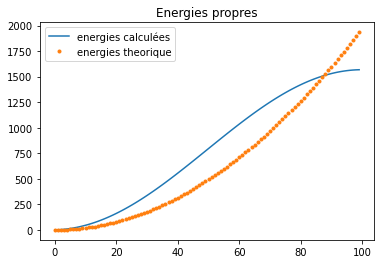

In [6]:
E, sols = Shrodinger(x, PotentielNul)

N = np.arange(n)

plt.plot(N, E, label="energies calculées")
plt.plot(N, E_puitCarre(L, N), ".", label="energies theorique")

plt.title("Energies propres")
plt.legend()
plt.show()

On remarque que pour des valeurs de n depassant 10 les energies theorique et calculées s'eloignent, et qu'elles finissent par diverger pour n>90.

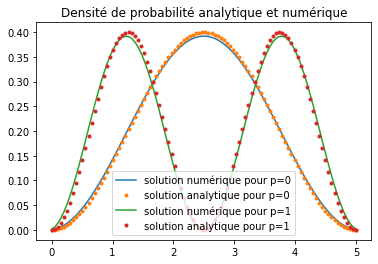

In [7]:
for i in range(2):
    plt.plot(x, abs(sols[:, i])**2, label=f"solution numérique pour p={ i }")
    
    sol = res_puitCarre(L, i)(x)
    plt.plot(x, abs(sol)**2, ".", label=f"solution analytique pour p={ i }")

plt.title("Densité de probabilité analytique et numérique")
plt.legend()
plt.show()

In [8]:
L = 5
d = 0.5
n = 500

x = np.linspace(0, L, n)

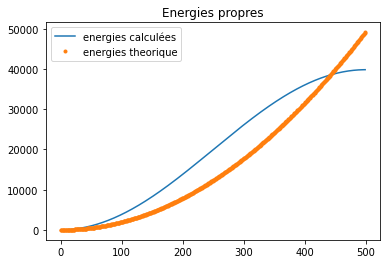

In [9]:
E, sols = Shrodinger(x, PotentielNul)

N = np.arange(n)

plt.plot(N, E, label="energies calculées")
plt.plot(N, E_puitCarre(L, N), ".", label="energies theorique")

plt.title("Energies propres")
plt.legend()
plt.show()

## Puit harmonique

On ecrit d'abord des fonctions qui retournent l'energie et la solution theorique dans le cas du puit harmonique

In [10]:
def ResHarmonique(L, p, w):
    sigma0 = 1/np.sqrt(w)
    hermite_p = hermite(p)
    
    def res(y):
        x = y - L/2
        return np.exp(-w*x*x/2) * hermite_p(x/sigma0) / np.sqrt(sigma0 * np.sqrt(np.pi) * 2**p * np.math.factorial(p))
    
    return res

def E_harmonique(w, p):
    return 2*w*(p + 1/2)

In [11]:
L = 20
v = 1/np.sqrt(2)
n = 100

x = np.linspace(0, L, n)

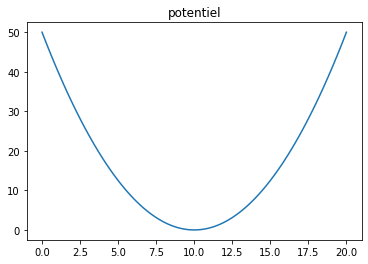

In [12]:
plt.plot(x, PuitsHarmonique(L, v)(x))
plt.title("potentiel")
plt.show()

On peut en suite resoudre numeriquement le probleme et comparer les resultats

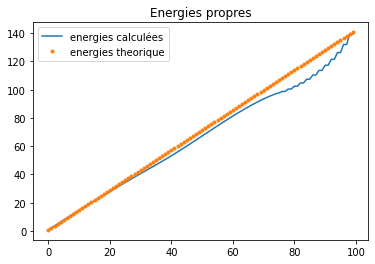

In [13]:
E, sols = Shrodinger(x, PuitsHarmonique(L, v))

N = np.arange(n)

plt.plot(N, E, label="energies calculées")
plt.plot(N, E_harmonique(v, N), ".", label="energies theorique")

plt.title("Energies propres")
plt.legend()
plt.show()

On remarque que energies theorique et calculées sont trés proches et le reste meme pour des grande valeurs de n.

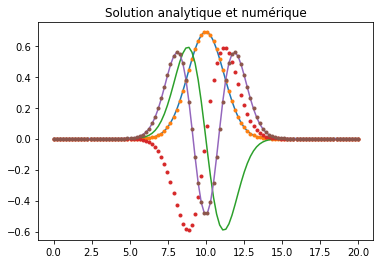

In [14]:
for i in range(3):
    plt.plot(x, sols[:, i], label=f"solution numérique pour p={ i }")
    
    res = ResHarmonique(L, i, v)
    sol = [res(j) for j in x]
    plt.plot(x, sol, '.', label=f"solution analytique pour p={ i }")

plt.title("Solution analytique et numérique")
#plt.legend()
plt.show()

On refait le calcul pour n=200

In [15]:
n = 200

x = np.linspace(0, L, n)

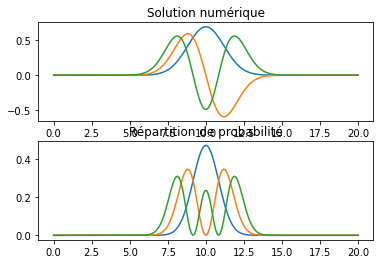

In [16]:
_, sols = Shrodinger(x, PuitsHarmonique(L, v))

plt.subplot(2, 1, 1)
plt.title("Solution numérique")
for i in range(3):
    plt.plot(x, sols[:, i])
    
plt.subplot(2, 1, 2)
plt.title("Répartition de probabilité")
for i in range(3):
    plt.plot(x, abs(sols[:, i])**2)

#plt.legend()
plt.show()

## Double puits

In [17]:
L = 6
v = 0.5
x0 = 1
n = 1000

x = np.linspace(0, L, n)

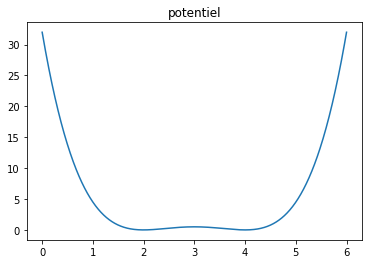

In [18]:
plt.plot(x, DoublePuits(L, x0, v)(x))
plt.title("potentiel")
plt.show()

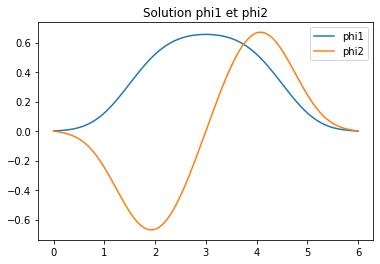

In [19]:
_, sols = Shrodinger(x, DoublePuits(L, x0, v))
phi_1, phi_2 = sols[:, 0], sols[:, 1]

plt.plot(x, phi_1, label="phi1")
plt.plot(x, phi_2, label="phi2")

plt.title("Solution phi1 et phi2")
plt.legend()
plt.show()

Phi1 est symetrique alors que phi2 est antisymetrique. Les fonctions d'onde avec plus de surface nodale (annulation) sont plus haute en energie ce qui parrait coherent.

Pour chacune de ces fonction la particule delocalisé (egalement localisée sur les deux puits).

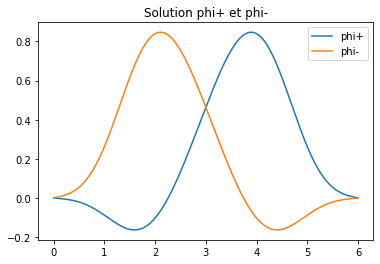

In [20]:
phi_p, phi_m = (phi_1 + phi_2)/np.sqrt(2), (phi_1 - phi_2)/np.sqrt(2)

plt.plot(x, phi_p, label="phi+")
plt.plot(x, phi_m, label="phi-")

plt.title("Solution phi+ et phi-")
plt.legend()
plt.show()

On remarque que phi+ et phi- sont equivalent (à une symetrie par rapport à x=L/2 pres).

On remarque que phi- est localisé majoritérement sur le puit de gauche et phi+ sur celui de droite.

Pour $\omega_i = \frac{E_i}{\hbar}$ on a $\psi_+ \left(x, t\right) = A_1 exp(\omega_1 t)\psi_1(x) + A_2 exp(\omega_2 t)\psi_2(x) $

On a donc une oscilation de la particule qui se deplace entre le puit de droite et le puit de gauche en traversant la barriere de potenciel centrale (effet tunnel). Cette oscilation se fait à une frequence environ egale à $\omega = \frac{\omega_1 + \omega_2}{2}$ (analogue à la frequence de battement).

On peut maintenant faire le meme calcul pour V = 0.5 :

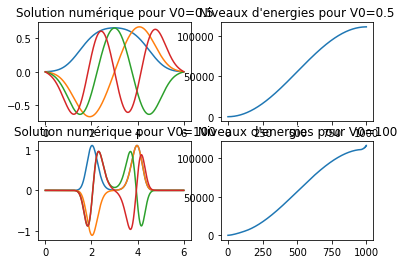

In [21]:
L = 6
v = 0.5
x0 = 1

N = np.arange(n)

E, sols = Shrodinger(x, DoublePuits(L, 1, v))

plt.subplot(2, 2, 1)
plt.title("Solution numérique pour V0=0.5")
for i in range(4):
    plt.plot(x, sols[:, i])
    
plt.subplot(2, 2, 2)
plt.title("Niveaux d'energies pour V0=0.5")
plt.plot(N, E)



v = 100

E, sols = Shrodinger(x, DoublePuits(L, 1, v))

plt.subplot(2, 2, 3)
plt.title("Solution numérique pour V0=100")
for i in range(4):
    plt.plot(x, sols[:, i])
    
plt.subplot(2, 2, 4)
plt.title("Niveaux d'energies pour V0=100")
plt.plot(N, E)

plt.show()

On remarque que quand V0 passe de 0.5 à 100 les etats sont beaucoup plus separé entre chaque puits.

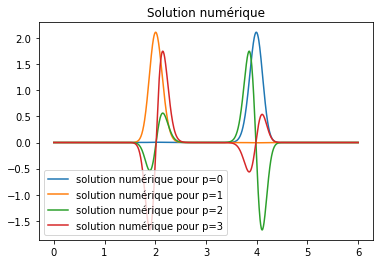

In [22]:
L = 6
v = 1000
x0 = 1

E, sols = Shrodinger(x, DoublePuits(L, 1, v))

for i in range(4):
    plt.plot(x, sols[:, i], label=f"solution numérique pour p={ i }")

plt.title("Solution numérique")
plt.legend()
plt.show()

Pour V = 1000 on peut voir que les etat propres sont analogue aux etats propres du puit harmonique sur chaque puit. Les deux puits sont donc trop fortement separé pour avoir une interaction.

### Puits double assymetrique

In [23]:
v = 10
F = 5

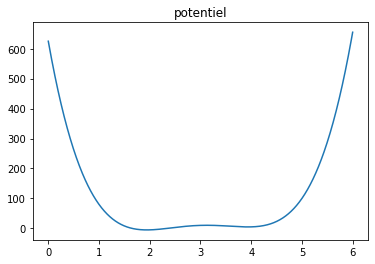

In [24]:
plt.plot(x, DoublePuits(L, 1, v, F)(x))
plt.title("potentiel")
plt.show()

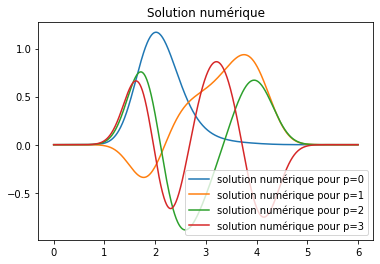

In [25]:
E, sols = Shrodinger(x, DoublePuits(L, 1, v, F))

for i in range(4):
    plt.plot(x, sols[:, i], label=f"solution numérique pour p={ i }")

plt.title("Solution numérique")
plt.legend()
plt.show()

On peut remaquer que l'asymetrie induit dans le potentiel se retrouve pour les solutions.

## Electron dans un cristal

On peut ecrire une fonction de potentiel pour le cristal

In [26]:
def Cristal(p, V0, n, L, d):
    def V(y):
        v, x = 0, y - L/2
        
        for i in range(n):
            x0 = i*d/(n - 1) - d/2
            v += np.exp(-abs(x - x0)/p)
            
        return -v*V0
    
    return V

Et on peut maintenant resoudre la fonction d'onde

In [27]:
L = 20
p = 0.5
V0 = 500
d = 12
n_atome = 10
n = 1000

x = np.linspace(0, L, n)

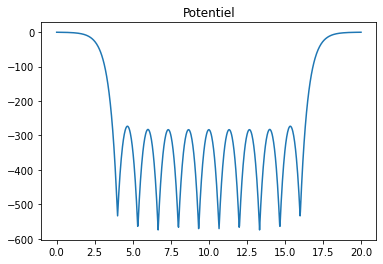

In [28]:
plt.plot(x, Cristal(p, V0, n_atome, L, d)(x))

plt.title("Potentiel")
plt.show()

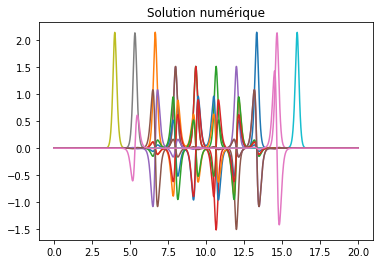

In [29]:
E, sols = Shrodinger(x, Cristal(p, V0, n_atome, L, d))

for i in range(17):
    plt.plot(x, sols[:, i], label=f"solution numérique pour p={ i }")

plt.title("Solution numérique")
#plt.legend()
plt.show()

On remaque que les solutions de plus basse energies sont localisé sur un atome (comme pour le puit harmonique) et que pour les etats d'energie juste au dessus on a des etats delocalisé sur deux atomes voisin (comme pour le puis double).